In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list

In [17]:
miRNA = pd.read_csv('./miRNA_for_table.csv')

miRNA.columns

Index(['miRNA in ctl_s1:', 'miRNA in s1_s2:', 'miRNA in s2_s3:',
       'miRNA in s3_s4:'],
      dtype='object')

In [18]:
ctl_s1 = miRNA['miRNA in ctl_s1:'].dropna().tolist()
s1_s2 = miRNA['miRNA in s1_s2:'].dropna().tolist()
s2_s3 = miRNA['miRNA in s2_s3:'].dropna().tolist()
s3_s4 = miRNA['miRNA in s3_s4:'].dropna().tolist()

In [19]:
# Create the union of all unique miRNA features
all_miRNA = set(ctl_s1).union(set(s1_s2)).union(set(s2_s3)).union(set(s3_s4))
all_miRNA = list(all_miRNA)

/var/folders/c_/rs13jmts3nbf9xfm917mh9p80000gn/T/ipykernel_57991/3372178432.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  miRNA_matrix = miRNA_matrix.fillna(0)


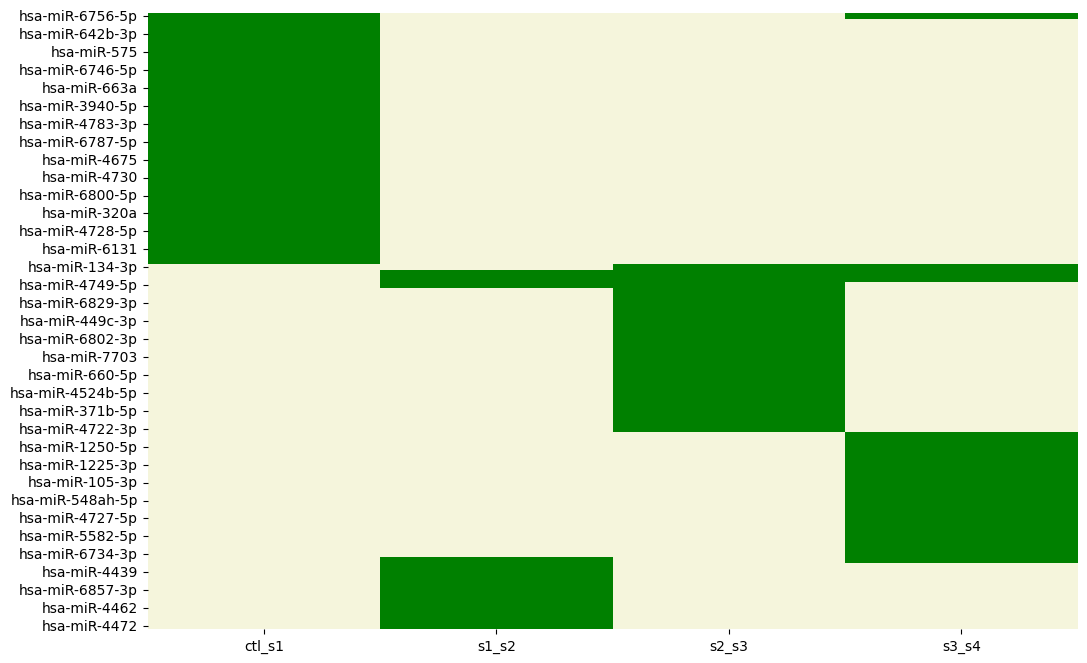

In [20]:
# Create a binary matrix for the miRNA features with the comparisons as the columns
miRNA_matrix = pd.DataFrame(index=all_miRNA, columns=['ctl_s1', 's1_s2', 's2_s3', 's3_s4'])
miRNA_matrix = miRNA_matrix.fillna(0)

# Fill in the binary matrix
for miRNA in all_miRNA:
    miRNA_matrix.loc[miRNA, 'ctl_s1'] = 1 if miRNA in ctl_s1 else 0
    miRNA_matrix.loc[miRNA, 's1_s2'] = 1 if miRNA in s1_s2 else 0
    miRNA_matrix.loc[miRNA, 's2_s3'] = 1 if miRNA in s2_s3 else 0
    miRNA_matrix.loc[miRNA, 's3_s4'] = 1 if miRNA in s3_s4 else 0

# Clustering
linkage_matrix = linkage(miRNA_matrix, method='average', metric='euclidean')

# Extract the order of miRNA after clustering
ordered_index = leaves_list(linkage_matrix)
ordered_miRNA_matrix = miRNA_matrix.iloc[ordered_index]

# Save the ordered matrix to Excel
ordered_miRNA_matrix.to_excel('./genecards_comparisons/miRNA_matrix_clustered.xlsx')

# Optional: Plot heatmap with the new order
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_miRNA_matrix, cmap=['beige', 'green'], cbar=False)
plt.show()